<a href="https://colab.research.google.com/github/kris96tian/MULTI_OMICS/blob/main/dorothea.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scanpy decoupler

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.8/95.8 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 8.3 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8026 sha256=07f8c6309175f8a19697dc8a26615253390d95f083141c1dee4cffe07c9da305
  Stored in directory: /root/.cache/pip/wheels/6a/aa/b9/eb5d4031476ec10802795b97ccf937b9bd998d68a9b268765a
Successfully built session-info


In [ ]:
!pip install omnipath

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.9/68.9 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docrep: filename=docrep-0.3.2-py3-none-any.whl size=19878 sha256=5eb14aa7a4e242a284bf3d832be9008454caa74e04264c5d1274c000652e9974
  Stored in directory: /root/.cache/pip/wheels/c3/64/48/03c38d8d906159eaa210b3c548fdb590eb3e2a4a5745ae2172
Successfully built docrep


In [ ]:
import scanpy as sc
import decoupler as dc
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# Load the files
adata = sc.read("/content/matrix.mtx", cache=True).T  # Transpose to get cells as rows and genes as columns
adata.var_names = pd.read_csv("/content/genes.tsv", header=None, sep="\t")[0]
adata.obs_names = pd.read_csv("/content/barcodes.tsv", header=None)[0]


In [ ]:
# Quality control
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

sc.pp.highly_variable_genes(adata)
sc.pp.scale(adata)

sc.tl.pca(adata)


In [ ]:
adata.

array([[-0.07643384,  2.2729416 , -0.6058163 , ..., -0.13045965,
        -0.08944604, -0.4738295 ],
       [-0.07643384, -0.3880626 , -0.6058163 , ..., -0.13045965,
        -0.08944604, -0.4738295 ],
       [-0.07643384, -0.3880626 , -0.6058163 , ..., -0.13045965,
        -0.08944604, -0.4738295 ],
       ...,
       [-0.07643384, -0.3880626 , -0.6058163 , ..., -0.13045965,
        -0.08944604, -0.4738295 ],
       [-0.07643384,  2.5061862 , -0.6058163 , ..., -0.13045965,
        -0.08944604, -0.4738295 ],
       [-0.07643384, -0.3880626 , -0.6058163 , ..., -0.13045965,
        -0.08944604, -0.4738295 ]], dtype=float32)

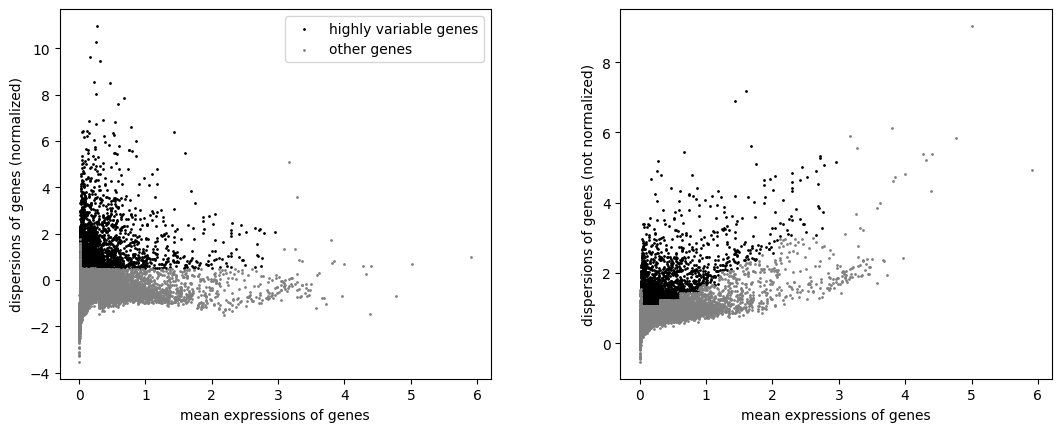

In [ ]:

sc.pl.highly_variable_genes(adata)


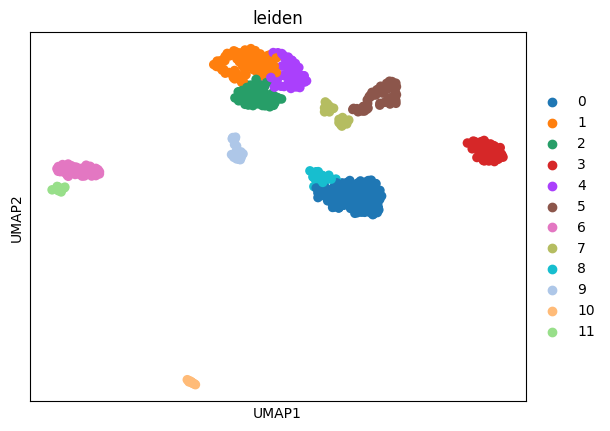

In [ ]:
sc.pp.neighbors(adata, use_rep='X_pca')
sc.tl.leiden(adata)
sc.tl.umap(adata)
sc.pl.umap(adata, color='leiden')

In [ ]:
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test_overestim_var')

/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:455: 

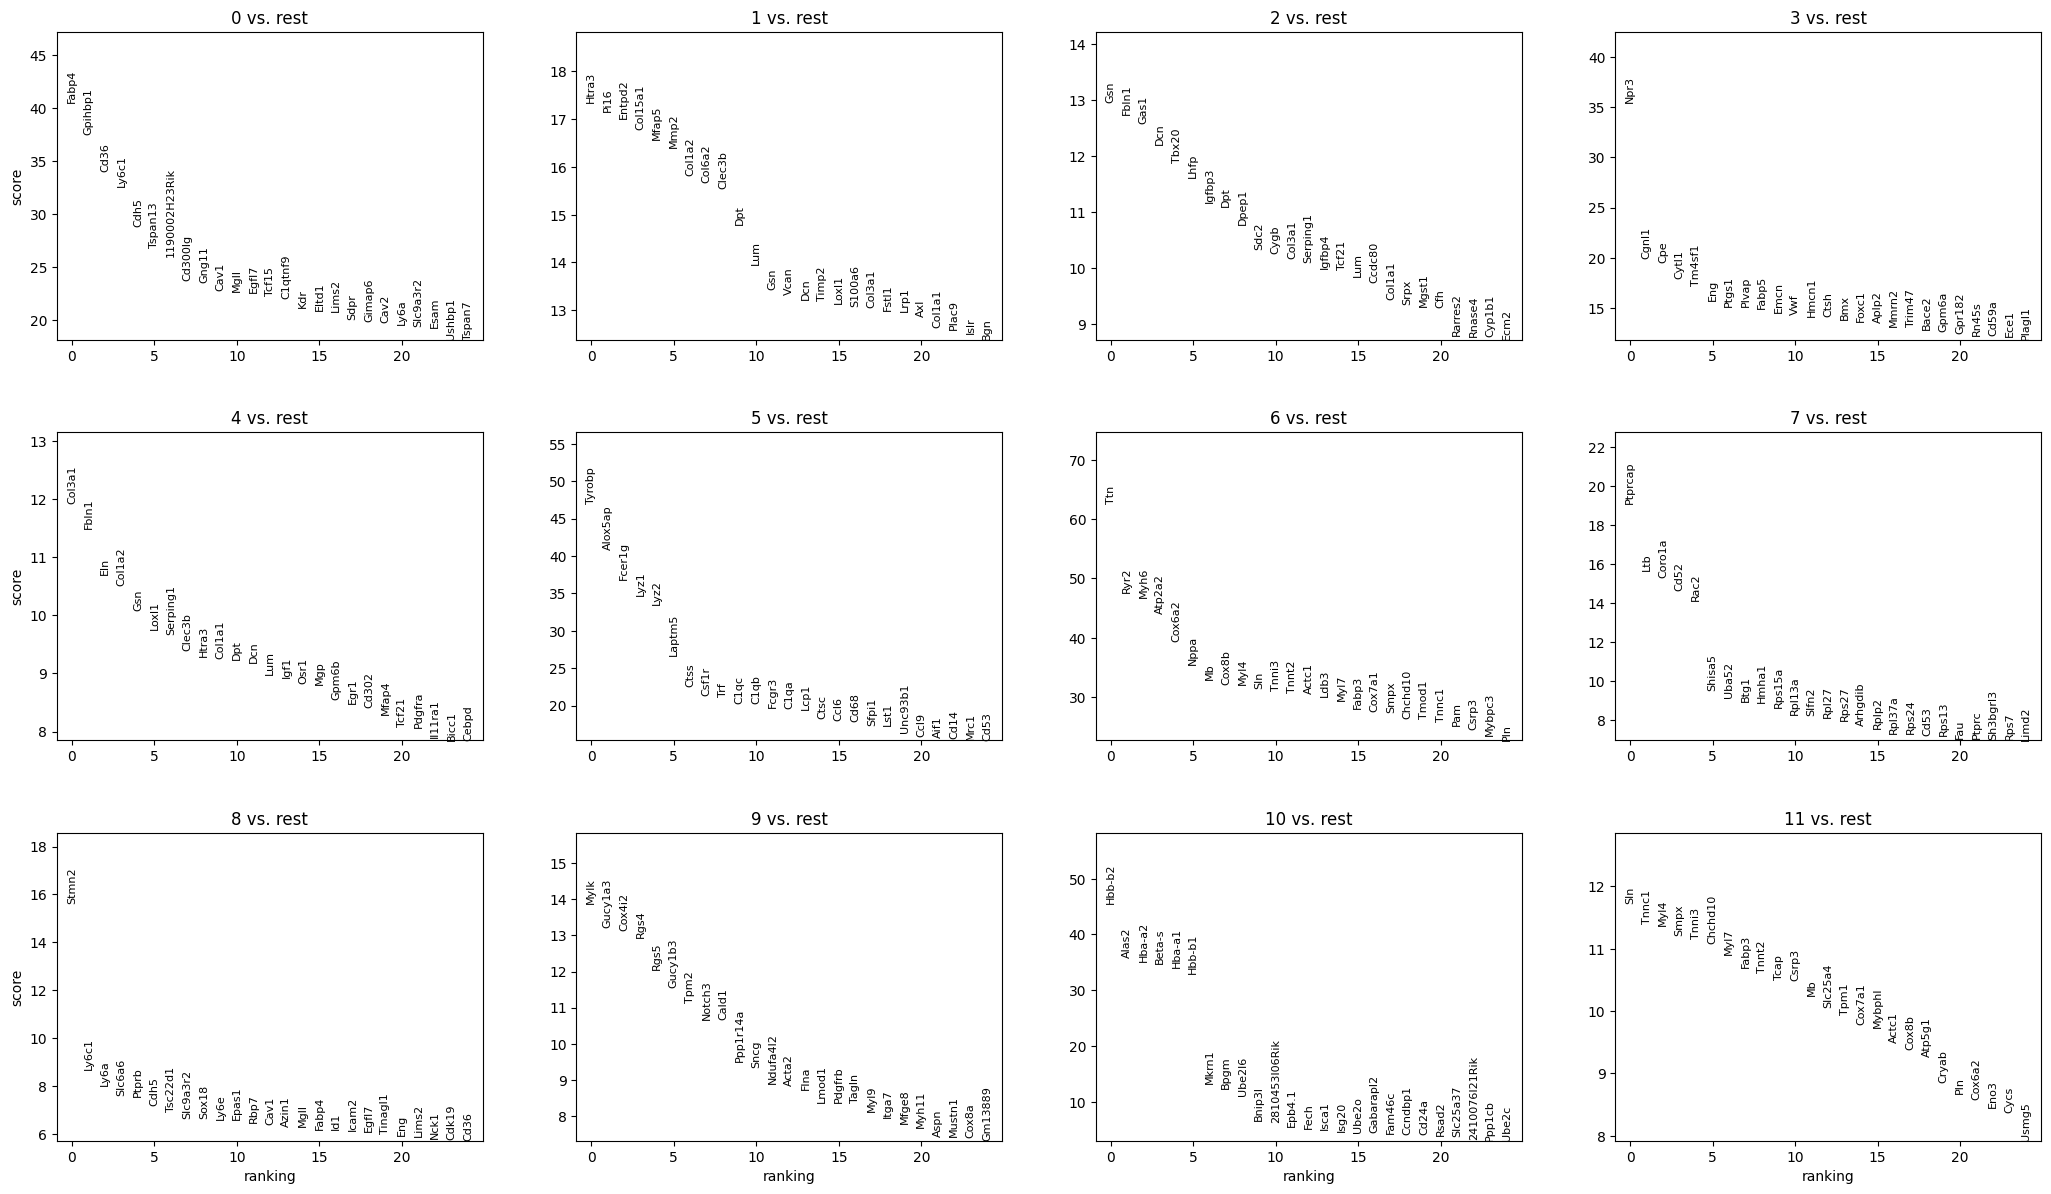

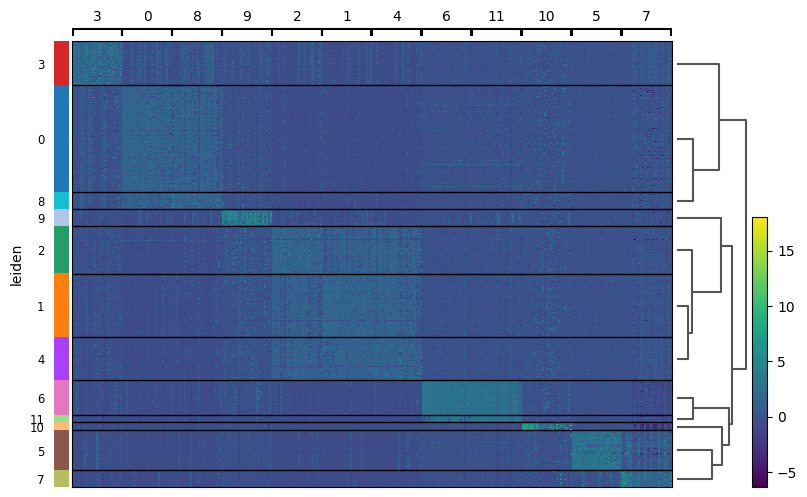

In [ ]:
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)  # Dot plot of top genes per cluster
sc.pl.rank_genes_groups_heatmap(adata, n_genes=25)

In [ ]:

all_results = pd.DataFrame()

# Iterate through clusters and append results
for group in adata.obs['leiden'].cat.categories:
    cluster_results = sc.get.rank_genes_groups_df(adata, group=group)
    # Sort the DataFrame for better readability
    cluster_results = cluster_results.sort_values(by=['scores', 'logfoldchanges'],ascending=False)
    # Add a 'cluster' column to identify which cluster the genes belong to
    cluster_results['cluster'] = group
    all_results = pd.concat([all_results, cluster_results])

# Save combined results to CSV
all_results.to_csv("all_clusters_dge.csv")
print("Saved combined results to all_clusters_dge.csv")


Saved combined results to all_clusters_dge.csv


In [ ]:



mat = pd.read_csv('/content/all_clusters_dge.csv',index_col=1)
mat.drop(columns='Unnamed: 0')


,scores,logfoldchanges,pvals,pvals_adj,cluster
names,,,,,
Fabp4,40.509624,NaN,2.633515e-93,1.198776e-89,0
Gpihbp1,37.564743,NaN,4.977183e-115,6.796841e-111,0
Cd36,34.005745,NaN,1.491803e-86,4.074414e-83,0
Ly6c1,32.603413,NaN,3.219975e-96,2.198599e-92,0
Cdh5,28.807993,NaN,1.472369e-86,4.074414e-83,0
...,...,...,...,...,...
Tmsb4x,-6.505833,NaN,5.074963e-06,1.605739e-03,11
Xist,-6.754944,NaN,3.754200e-06,1.314548e-03,11
Actg1,-6.922570,NaN,3.316741e-06,1.237963e-03,11


In [ ]:
# Check for duplicate index values (gene names)
duplicate_genes = mat.index.duplicated(keep=False)
mat_unique = mat[~mat.index.duplicated(keep='first')]
mat = mat_unique

In [ ]:
mat.drop(columns=['Unnamed: 0', 'logfoldchanges'], inplace=True)

In [ ]:

#import dorothea network
net = dc.get_dorothea(organism='mus musculus')

0.00B [00:00, ?B/s]

In [ ]:


tf_acts, tf_pvals = dc.run_consensus(mat=mat.transpose(), net=net)

In [ ]:


tf_acts, tf_pvals = dc.run_mlm(mat=tf_acts, net=net, source='source', target='target', weight='weight', verbose=True)

Running mlm on mat with 3 samples and 80 targets for 12 sources.


In [ ]:
tf_acts

array([[-1.3947428 ,  1.3953432 ,  1.4123915 ,  1.4141495 , -1.3889861 ,
        -1.3926897 ,  1.3017768 ,  1.3980627 ,  0.60723644, -1.3589962 ,
        -0.19806665,  1.3610368 ],
       [ 0.89990383, -0.89707845, -0.7683456 , -0.718723  ,  0.46419322,
         0.9092099 , -1.1294622 , -0.51446295,  0.80247754,  1.0183889 ,
        -1.1136403 , -0.3478261 ],
       [ 0.494839  , -0.49826473, -0.64404595, -0.6954265 ,  0.92479295,
         0.48347983, -0.17231457, -0.88359976, -1.409714  ,  0.34060737,
         1.3117069 , -1.0132108 ]], dtype=float32)

In [ ]:
tf_pvals.shape

(3, 12)

In [ ]:
net


,source,confidence,target,weight
0,Myc,A,Tert,1.0
1,Myc,A,Cct5,1.0
2,Myc,A,Gnl3,1.0
3,Myc,A,Nol7,1.0
4,Myc,A,Dpy30,1.0
...,...,...,...,...
2800,Jun,A,Myb,1.0
2801,Jund,A,Myb,1.0
2802,Lhx3,A,Fshb,1.0
2803,Usf1,A,Hmox1,1.0


In [ ]:
print(type(tf_acts))
print(net.dtypes)


<class 'numpy.ndarray'>
source         object
confidence     object
target         object
weight        float64
dtype: object


In [ ]:
from sklearn.preprocessing import StandardScaler

# Extract numeric features from `net` DataFrame
net_numeric = net.select_dtypes(include='number')

# Standardize numeric features in `net`
scaler_net = StandardScaler()
net_scaled = scaler_net.fit_transform(net_numeric)

# Reconstruct DataFrame with scaled numeric features
net_scaled = pd.DataFrame(net_scaled, columns=net_numeric.columns, index=net.index)

# Combine non-numeric columns (e.g., 'source', 'target') back
net_final = pd.concat([net.select_dtypes(exclude='number'), net_scaled], axis=1)

# Standardize `tf_acts` (already a NumPy array)
scaler_tf_acts = StandardScaler()
tf_acts_scaled = scaler_tf_acts.fit_transform(tf_acts)


In [ ]:
# Convert `tf_acts_scaled` (NumPy array) back to Pandas DataFrame
tf_acts_scaled = pd.DataFrame(tf_acts_scaled, index=tf_acts.index, columns=tf_acts.columns)


In [ ]:

results = dc.decouple(tf_acts_scaled, net_final, min_n=0, verbose=False)

LinAlgError: Singular matrix